In [201]:
!pip install numpy pandas matplotlib seaborn

You should consider upgrading via the 'C:\Users\andre\ITCS3162\Scripts\python.exe -m pip install --upgrade pip' command.


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
#https://www.kaggle.com/adityak2003/college-basketball-players-20092021?select=CollegeBasketballPlayers2009-2021.csv

#How well can a college basketball player's statistics predict when they will be drafted in the NBA draft?

In [36]:
nbaDraft = pd.read_csv (r'C:\Users\andre\Downloads\NBA - College and Draft\College2009-2021.csv')

nbaDraft.isna().sum()

nbaDraft.shape

nbaDraft.columns

C:\Users\andre\ITCS3162\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['player_name', 'team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG',
       'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA',
       'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per',
       'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe',
       'pfr', 'year', 'pid', 'type', 'Rec Rank', 'ast/tov', 'rimmade',
       'rimmade+rimmiss', 'midmade', 'midmade+midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade',
       'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'Unnamed: 64', 'Unnamed: 65'],
      dtype='object')

In [37]:
#Row selection 

#Only keep rows where a player was drafted
nbaDraft = nbaDraft[nbaDraft.pick.notnull()]

nbaDraft.pick




#Column selection 

#My initial filtering of columns
#nbaDraft = nbaDraft[['player_name', 'team', 'conf', 'GP', 'mp', 'pts', 'Ortg', 'AST_per', 'ORB_per', 
                     #'DRB_per', 'TS_per', 'drtg', 'stl_per', 'blk_per', 'TO_per', 'yr', 'eFG', 'pick']]

#Filtering columns to perfrom correlations
#These variables were chosen basen on null values, relevance, and simplicity
nbaDraft = nbaDraft[['player_name', 'team', 'conf', 'pick', 'GP', 'mp', 'pts', 'Ortg', 'AST_per', 'ORB_per', 
                     'DRB_per', 'TS_per', 'drtg', 'stl_per', 'blk_per', 'TO_per', 'yr', 'eFG', 'oreb', 
                     'dreb', 'treb', 'ast', 'stl', 'blk', 'twoP_per', 'TP_per', 'FT_per', 'ast/tov']]

nbaDraft.columns
nbaDraft

,player_name,team,conf,pick,GP,mp,pts,Ortg,AST_per,ORB_per,...,oreb,dreb,treb,ast,stl,blk,twoP_per,TP_per,FT_per,ast/tov
33,Charles Jenkins,Hofstra,CAA,44.0,31,35.0323,19.5161,104.3,32.6,2.7,...,0.9032,3.8387,4.7419,4.3226,1.4194,0.4516,0.419,0.319,0.821,1.276195
100,Ryan Reid,Florida St.,ACC,57.0,35,19.1143,4.9143,82.0,7.9,9.5,...,1.4857,2.2286,3.7143,0.7429,0.6571,0.6571,0.440,0.000,0.632,0.361139
102,Kyle Singler,Duke,ACC,33.0,37,32.2703,16.4595,111.8,15.5,10.6,...,3.0270,4.6486,7.6757,2.4054,1.5405,1.0270,0.476,0.383,0.713,0.967384
103,Nolan Smith,Duke,ACC,21.0,34,21.6176,8.3824,105.3,15.2,3.5,...,0.6765,1.5000,2.1765,1.7059,0.9412,0.0588,0.467,0.346,0.849,1.054587
104,E'Twaun Moore,Purdue,B10,55.0,37,33.0811,13.8378,98.4,19.8,3.9,...,1.0541,3.5676,4.6216,3.0000,1.0811,0.4324,0.473,0.337,0.762,1.144339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60619,Day'Ron Sharpe,North Carolina,ACC,29.0,29,19.1724,9.4828,101.9,15.4,18.3,...,3.3793,4.2069,7.5862,1.4483,0.7931,0.8966,0.523,0.000,0.505,0.736861
60623,Isaiah Jackson,Kentucky,SEC,22.0,25,20.6400,8.4400,108.0,7.5,11.3,...,2.1200,4.4800,6.6000,0.7200,0.7600,2.6000,0.548,0.000,0.700,0.473684
60714,Greg Brown III,Texas,B12,43.0,26,20.5769,9.3462,91.7,3.8,6.8,...,1.1923,4.9615,6.1538,0.3846,0.5769,1.0000,0.500,0.330,0.708,0.166659
60760,Keon Johnson,Tennessee,SEC,21.0,27,25.0000,11.2593,95.2,21.2,4.8,...,1.0370,2.4444,3.4815,2.4815,1.1111,0.4074,0.490,0.271,0.703,0.943680


In [38]:
#Filling in the ONLY (1) na value with the mean to prevent a loss of data
ast_mean = nbaDraft['ast/tov'].mean()
nbaDraft['ast/tov'] = nbaDraft['ast/tov'].fillna(ast_mean)

nbaDraft.isna().sum()

player_name    0
team           0
conf           0
pick           0
GP             0
mp             0
pts            0
Ortg           0
AST_per        0
ORB_per        0
DRB_per        0
TS_per         0
drtg           0
stl_per        0
blk_per        0
TO_per         0
yr             0
eFG            0
oreb           0
dreb           0
treb           0
ast            0
stl            0
blk            0
twoP_per       0
TP_per         0
FT_per         0
ast/tov        0
dtype: int64

In [39]:
#Since players are repeated for every year they played, the avg is taken 
careerStat = nbaDraft.groupby('player_name').mean().reset_index()

#To view every year that the player played
nbaDraft[nbaDraft['player_name'] == 'Kyle Singler']

#To view the averages of the player throughout their career in college
#Team and conf are excluded due to the avg being taken
careerStat[careerStat['player_name'] == 'Kyle Singler']

careerStat

,player_name,pick,GP,mp,pts,Ortg,AST_per,ORB_per,DRB_per,TS_per,...,oreb,dreb,treb,ast,stl,blk,twoP_per,TP_per,FT_per,ast/tov
0,A.J. Hammons,46.0,32.750000,24.32770,12.076750,104.875000,7.500000,11.35,21.150000,57.070000,...,2.389225,4.693000,7.082225,0.78765,0.365725,2.6099,0.540000,0.136250,0.689750,0.391999
1,A.J. Price,52.0,34.000000,31.67650,14.588200,108.500000,28.500000,2.10,9.200000,53.920000,...,0.588200,2.970600,3.558800,4.70590,0.647100,0.0000,0.422000,0.398000,0.721000,1.739126
2,Aaron Gordon,4.0,38.000000,31.23680,12.368400,105.500000,13.000000,10.40,19.300000,50.270000,...,2.684200,5.289500,7.973700,1.97370,0.894700,1.0263,0.513000,0.356000,0.422000,1.363618
3,Aaron Holiday,23.0,33.666667,31.89550,14.309033,106.833333,25.133333,1.70,8.666667,57.286667,...,0.480767,2.695167,3.175933,4.72530,1.254067,0.2197,0.469333,0.419667,0.782667,1.577507
4,Aaron Nesmith,14.0,23.000000,32.35715,17.015600,114.750000,8.850000,3.35,15.600000,61.090000,...,0.924100,4.270100,5.194150,1.16740,1.073700,0.7098,0.487000,0.429500,0.825000,0.711986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,Zach LaVine,13.0,37.000000,24.43240,9.432400,107.300000,12.600000,2.40,9.500000,54.480000,...,0.486500,2.054100,2.540500,1.78380,0.891900,0.1622,0.494000,0.375000,0.691000,1.571491
639,Zeke Nnaji,22.0,32.000000,30.56250,16.093800,116.100000,5.800000,11.50,20.400000,62.960000,...,3.093800,5.531200,8.625000,0.84380,0.718800,0.8750,0.586000,0.294000,0.760000,0.385737
640,Zhaire Smith,16.0,37.000000,28.40540,11.216200,124.300000,12.100000,9.10,11.200000,61.510000,...,2.135100,2.756800,4.891900,1.72970,1.162200,1.0270,0.570000,0.450000,0.717000,1.523830
641,Ziaire Williams,10.0,20.000000,27.90000,10.700000,85.000000,16.400000,2.40,16.400000,47.290000,...,0.500000,4.050000,4.550000,2.20000,0.850000,0.5500,0.427000,0.291000,0.796000,0.758621


In [40]:
#Correlation for each selected variable
df = careerStat.corr()
df

,pick,GP,mp,pts,Ortg,AST_per,ORB_per,DRB_per,TS_per,drtg,...,oreb,dreb,treb,ast,stl,blk,twoP_per,TP_per,FT_per,ast/tov
pick,1.000000,-0.078749,-0.143339,-0.236700,-0.187112,-0.043762,-0.078999,-0.085169,-0.200262,0.216587,...,-0.128864,-0.179233,-0.172631,-0.074473,-0.182221,-0.150721,-0.200947,-0.028171,0.020476,0.024705
GP,-0.078749,1.000000,0.135063,0.010628,0.239333,-0.027792,-0.010309,-0.158317,0.071934,-0.058680,...,0.043179,-0.051713,-0.016061,0.037936,0.018589,-0.069151,0.014810,-0.007125,0.031016,0.122711
mp,-0.143339,0.135063,1.000000,0.755078,0.179241,0.461512,-0.391634,-0.214376,0.028283,0.291466,...,-0.049218,0.298957,0.177006,0.552482,0.526679,-0.130393,-0.181716,0.330309,0.392001,0.388710
pts,-0.236700,0.010628,0.755078,1.000000,0.289742,0.355793,-0.215192,-0.067818,0.221000,0.224319,...,0.045559,0.320602,0.231121,0.388205,0.376284,-0.101561,-0.015866,0.291633,0.414660,0.118978
Ortg,-0.187112,0.239333,0.179241,0.289742,1.000000,-0.051078,0.149638,0.012804,0.781582,-0.052863,...,0.186113,0.103628,0.146683,0.018162,0.012152,0.072488,0.491334,0.110961,0.329051,0.229876
AST_per,-0.043762,-0.027792,0.461512,0.355793,-0.051078,1.000000,-0.608555,-0.451383,-0.221085,0.292600,...,-0.509288,-0.214250,-0.355552,0.968284,0.596564,-0.462949,-0.369160,0.338707,0.322275,0.771176
ORB_per,-0.078999,-0.010309,-0.391634,-0.215192,0.149638,-0.608555,1.000000,0.740248,0.280826,-0.528905,...,0.913077,0.517649,0.725743,-0.606427,-0.403437,0.611805,0.560262,-0.575164,-0.546901,-0.622830
DRB_per,-0.085169,-0.158317,-0.214376,-0.067818,0.012804,-0.451383,0.740248,1.000000,0.198998,-0.556171,...,0.719358,0.843471,0.859826,-0.450291,-0.298384,0.578578,0.422351,-0.350313,-0.376737,-0.521931
TS_per,-0.200262,0.071934,0.028283,0.221000,0.781582,-0.221085,0.280826,0.198998,1.000000,-0.151387,...,0.267493,0.206155,0.248653,-0.172603,-0.127848,0.281153,0.767328,-0.036021,0.138632,-0.148599
drtg,0.216587,-0.058680,0.291466,0.224319,-0.052863,0.292600,-0.528905,-0.556171,-0.151387,1.000000,...,-0.464786,-0.412422,-0.467896,0.311652,0.023649,-0.524871,-0.282606,0.286147,0.313914,0.298533


In [41]:
#Use these columns, minimize redundancy if possible

#remove total rebounds, since oreb and dreb are both included (not as highly correlated with eachother)
#remove stl_per since stl is higher
#remove eFG and twoP_per, TS_per is higher -- TS_per, eFG and twoP_per are highly correlated with eachother 

df2 = df[df['pick'] < -0.10]
df2

,pick,GP,mp,pts,Ortg,AST_per,ORB_per,DRB_per,TS_per,drtg,...,oreb,dreb,treb,ast,stl,blk,twoP_per,TP_per,FT_per,ast/tov
mp,-0.143339,0.135063,1.000000,0.755078,0.179241,0.461512,-0.391634,-0.214376,0.028283,0.291466,...,-0.049218,0.298957,0.177006,0.552482,0.526679,-0.130393,-0.181716,0.330309,0.392001,0.388710
pts,-0.236700,0.010628,0.755078,1.000000,0.289742,0.355793,-0.215192,-0.067818,0.221000,0.224319,...,0.045559,0.320602,0.231121,0.388205,0.376284,-0.101561,-0.015866,0.291633,0.414660,0.118978
Ortg,-0.187112,0.239333,0.179241,0.289742,1.000000,-0.051078,0.149638,0.012804,0.781582,-0.052863,...,0.186113,0.103628,0.146683,0.018162,0.012152,0.072488,0.491334,0.110961,0.329051,0.229876
TS_per,-0.200262,0.071934,0.028283,0.221000,0.781582,-0.221085,0.280826,0.198998,1.000000,-0.151387,...,0.267493,0.206155,0.248653,-0.172603,-0.127848,0.281153,0.767328,-0.036021,0.138632,-0.148599
stl_per,-0.135598,-0.036549,0.171900,0.078232,-0.071804,0.471642,-0.299552,-0.252679,-0.180356,-0.126177,...,-0.246501,-0.169541,-0.215627,0.437969,0.902651,-0.249970,-0.204140,0.224163,0.092698,0.406241
eFG,-0.180380,0.063228,-0.105592,0.064765,0.667319,-0.337687,0.404050,0.286668,0.928285,-0.223841,...,0.357648,0.229867,0.302193,-0.292934,-0.214737,0.373400,0.857975,-0.160871,-0.162447,-0.237041
oreb,-0.128864,0.043179,-0.049218,0.045559,0.186113,-0.509288,0.913077,0.719358,0.267493,-0.464786,...,1.000000,0.695769,0.880024,-0.481768,-0.231902,0.628299,0.508587,-0.471212,-0.451689,-0.544217
dreb,-0.179233,-0.051713,0.298957,0.320602,0.103628,-0.214250,0.517649,0.843471,0.206155,-0.412422,...,0.695769,1.000000,0.953419,-0.165531,-0.029183,0.530744,0.329902,-0.166163,-0.183433,-0.315406
treb,-0.172631,-0.016061,0.177006,0.231121,0.146683,-0.355552,0.725743,0.859826,0.248653,-0.467896,...,0.880024,0.953419,1.000000,-0.311780,-0.116688,0.614803,0.431727,-0.307764,-0.310984,-0.437107
stl,-0.182221,0.018589,0.526679,0.376284,0.012152,0.596564,-0.403437,-0.298384,-0.127848,0.023649,...,-0.231902,-0.029183,-0.116688,0.618410,1.000000,-0.252378,-0.223747,0.298232,0.233282,0.499040


In [42]:
#Use these columns
df2 = df[df['pick'] > 0.10]
df2

,pick,GP,mp,pts,Ortg,AST_per,ORB_per,DRB_per,TS_per,drtg,...,oreb,dreb,treb,ast,stl,blk,twoP_per,TP_per,FT_per,ast/tov
pick,1.000000,-0.078749,-0.143339,-0.236700,-0.187112,-0.043762,-0.078999,-0.085169,-0.200262,0.216587,...,-0.128864,-0.179233,-0.172631,-0.074473,-0.182221,-0.150721,-0.200947,-0.028171,0.020476,0.024705
drtg,0.216587,-0.058680,0.291466,0.224319,-0.052863,0.292600,-0.528905,-0.556171,-0.151387,1.000000,...,-0.464786,-0.412422,-0.467896,0.311652,0.023649,-0.524871,-0.282606,0.286147,0.313914,0.298533


In [43]:
#Keeping columns that are correlated higher with the target value of draft pick
careerStat = careerStat[['player_name', 'pick', 'mp', 'pts', 'Ortg', 'oreb', 
                         'dreb', 'TS_per', 'drtg', 'stl', 'blk']]
careerStat

,player_name,pick,mp,pts,Ortg,oreb,dreb,TS_per,drtg,stl,blk
0,A.J. Hammons,46.0,24.32770,12.076750,104.875000,2.389225,4.693000,57.070000,93.283000,0.365725,2.6099
1,A.J. Price,52.0,31.67650,14.588200,108.500000,0.588200,2.970600,53.920000,97.477600,0.647100,0.0000
2,Aaron Gordon,4.0,31.23680,12.368400,105.500000,2.684200,5.289500,50.270000,87.749200,0.894700,1.0263
3,Aaron Holiday,23.0,31.89550,14.309033,106.833333,0.480767,2.695167,57.286667,105.922667,1.254067,0.2197
4,Aaron Nesmith,14.0,32.35715,17.015600,114.750000,0.924100,4.270100,61.090000,104.625500,1.073700,0.7098
...,...,...,...,...,...,...,...,...,...,...,...
638,Zach LaVine,13.0,24.43240,9.432400,107.300000,0.486500,2.054100,54.480000,103.564000,0.891900,0.1622
639,Zeke Nnaji,22.0,30.56250,16.093800,116.100000,3.093800,5.531200,62.960000,91.330300,0.718800,0.8750
640,Zhaire Smith,16.0,28.40540,11.216200,124.300000,2.135100,2.756800,61.510000,94.387200,1.162200,1.0270
641,Ziaire Williams,10.0,27.90000,10.700000,85.000000,0.500000,4.050000,47.290000,97.978300,0.850000,0.5500


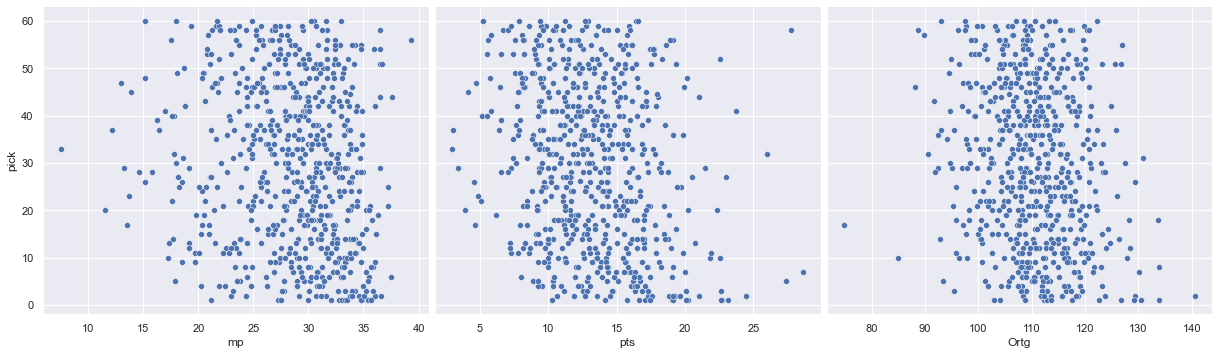

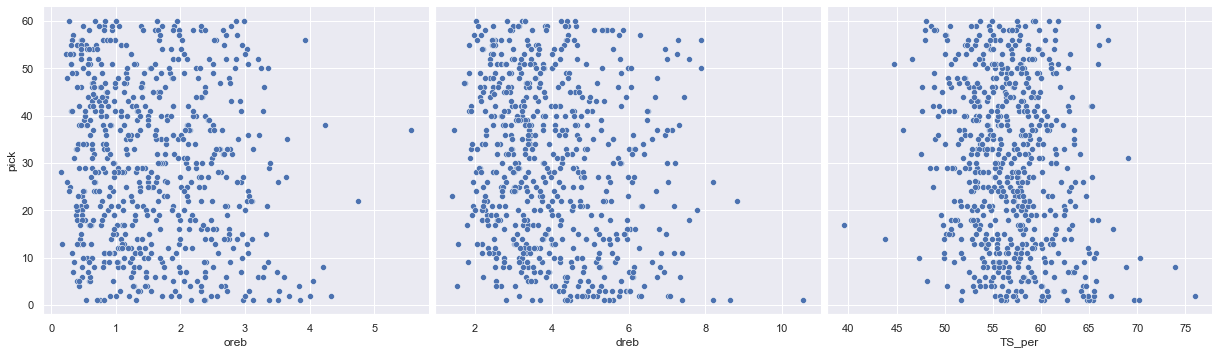

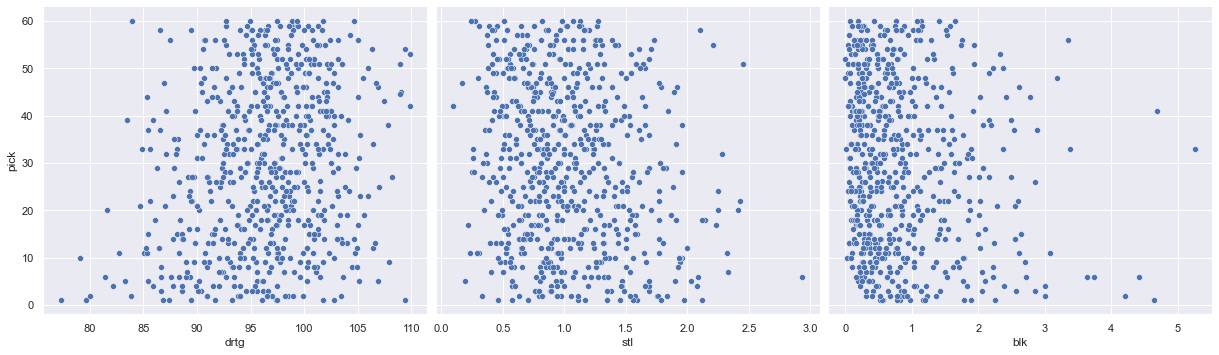

In [11]:
#Before creating bins, the following will represent the initial relationships between the variables
sns.set_theme(style="darkgrid")

plt1 = sns.pairplot(
    careerStat,
    x_vars=["mp", "pts", 'Ortg'],
    y_vars=["pick"],
    height=5,
    aspect=1.15,
)

plt2 = sns.pairplot(
    careerStat,
    x_vars=['oreb', 'dreb', 'TS_per'],
    y_vars=["pick"],
    height=5,
    aspect=1.15
)

plt3 = sns.pairplot(
    careerStat,
    x_vars=['drtg', 'stl', 'blk'],
    y_vars=["pick"],
    height=5,
    aspect=1.15
)


In [455]:
#Saving as CSV

#This includes the variables selected by me
#careerStat.to_csv(r'C:\Users\andre\Downloads\NBA - College and Draft\careerStat.csv', index = False)

#This includes the variables selected based on correlation
#careerStat.to_csv(r'C:\Users\andre\Downloads\NBA - College and Draft\careerStat2.csv', index = False)

In [44]:
#two picks were decimals, which were changed manually in excel to their correct draft picks
#re-importing data
careerStat = pd.read_csv (r'C:\Users\andre\Downloads\NBA - College and Draft\careerStat2.csv')

In [45]:
#Modifying data for classification

#Assure that there are not any null values
careerStat.isna().sum()

player_name    0
pick           0
mp             0
pts            0
Ortg           0
oreb           0
dreb           0
TS_per         0
drtg           0
stl            0
blk            0
dtype: int64

In [46]:
#bins for pick, first for graphing
#careerStat['pick'] = pd.qcut(careerStat['pick'], q=4) #labels=d_bins)

#Bins into early and late first and second round to better visualize data
careerStat['pick'] = pd.cut(careerStat['pick'], bins=[0, 15, 30, 45, 60])

In [47]:
#class variable 
print(careerStat['pick'].value_counts())

(0, 15]     170
(15, 30]    165
(30, 45]    159
(45, 60]    149
Name: pick, dtype: int64


<AxesSubplot:title={'center':'Minutes Played'}, xlabel='Pick bin', ylabel='mp'>

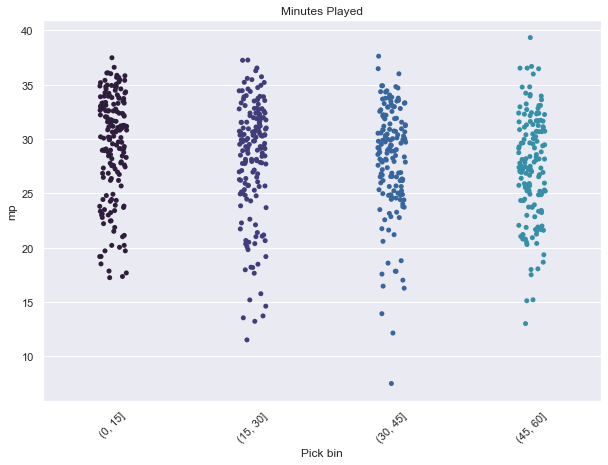

In [49]:
sns.set_palette("mako")

gp = sns.stripplot(x='pick', y='mp', data=careerStat)

gp.set_xticklabels(gp.get_xticklabels(), rotation=45)
gp.set(title='Minutes Played', xlabel='Pick bin')
sns.set(rc={"figure.figsize":(10,7)}) 


gp

<AxesSubplot:title={'center':'Points'}, xlabel='Pick bin', ylabel='pts'>

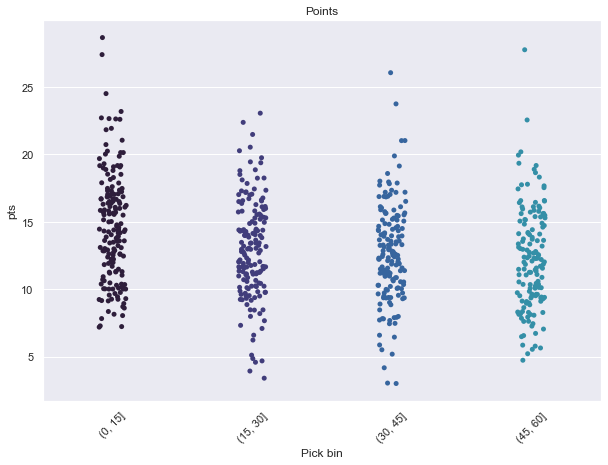

In [313]:
sns.set_palette("mako")

pts = sns.stripplot(x='pick', y='pts', data=careerStat)

pts.set(title='Points', xlabel='Pick bin')
pts.set_xticklabels(pts.get_xticklabels(), rotation=45)
sns.set(rc={"figure.figsize":(10,7)}) 


pts

<AxesSubplot:title={'center':'Offensive Rating'}, xlabel='Pick bin', ylabel='Ortg'>

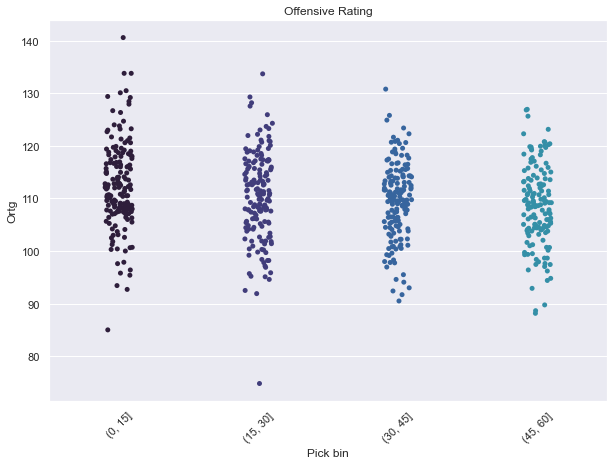

In [305]:
off_r = sns.stripplot(x='pick', y='Ortg', data=careerStat)

off_r.set(title='Offensive Rating', xlabel='Pick bin')
off_r.set_xticklabels(off_r.get_xticklabels(), rotation=45)

off_r

<AxesSubplot:title={'center':'Offensive Rebounds'}, xlabel='Pick bin', ylabel='oreb'>

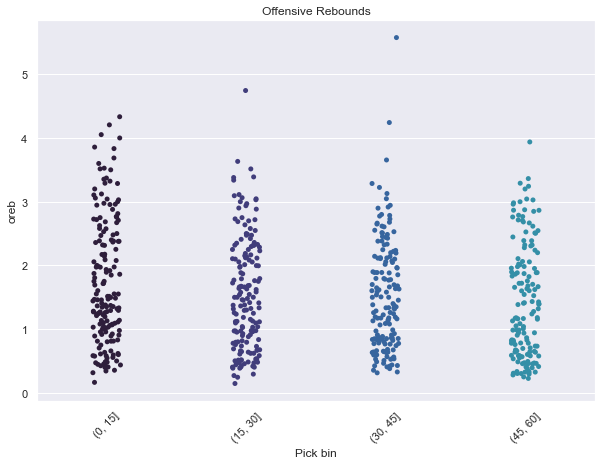

In [306]:
orb = sns.stripplot(x='pick', y='oreb', data=careerStat)

orb.set(title='Offensive Rebounds', xlabel='Pick bin')
orb.set_xticklabels(orb.get_xticklabels(), rotation=45)

orb

<AxesSubplot:title={'center':'Defensive Rebound'}, xlabel='Pick bin', ylabel='dreb'>

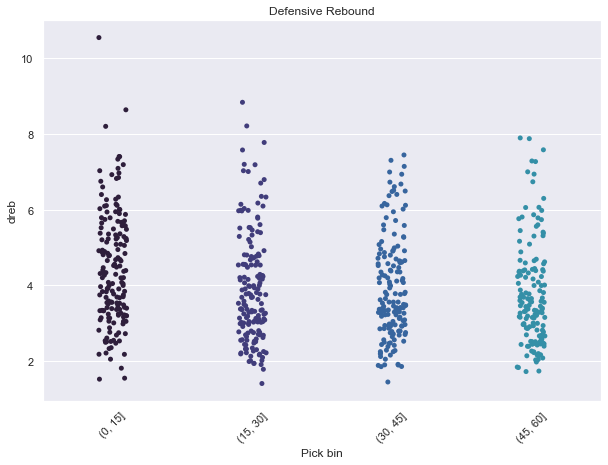

In [307]:
drb = sns.stripplot(x='pick', y='dreb', data=careerStat)

drb.set(title='Defensive Rebound', xlabel='Pick bin')
drb.set_xticklabels(drb.get_xticklabels(), rotation=45)

drb

<AxesSubplot:title={'center':'True Shooting Pct'}, xlabel='Pick bin', ylabel='TS_per'>

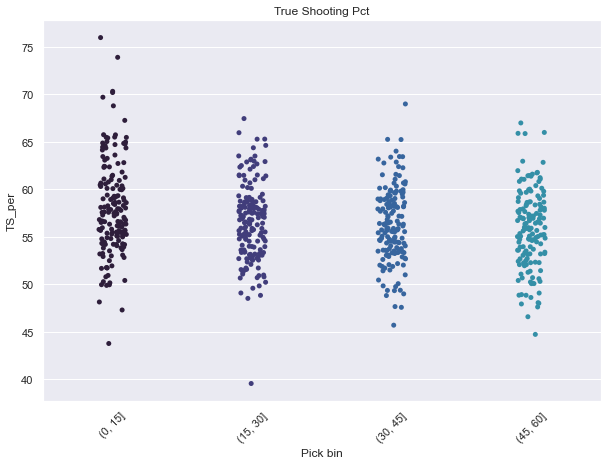

In [308]:
ts = sns.stripplot(x='pick', y='TS_per', data=careerStat)

ts.set(title='True Shooting Pct', xlabel='Pick bin')
ts.set_xticklabels(ts.get_xticklabels(), rotation=45)

ts

<AxesSubplot:title={'center':'Defense Rating'}, xlabel='Pick bin', ylabel='drtg'>

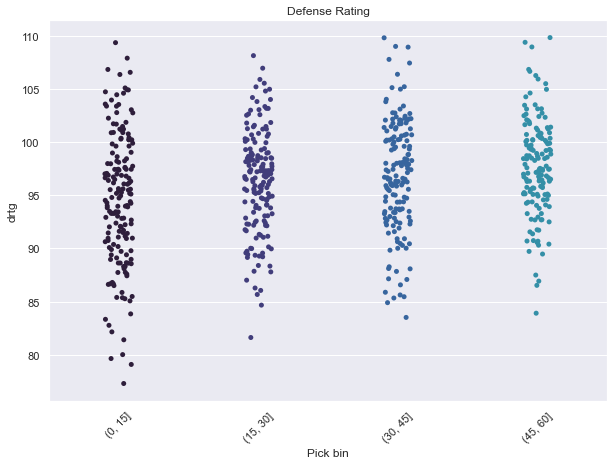

In [309]:
def_r = sns.stripplot(x='pick', y='drtg', data=careerStat)

def_r.set(title='Defense Rating', xlabel='Pick bin')
def_r.set_xticklabels(def_r.get_xticklabels(), rotation=45)

def_r

<AxesSubplot:title={'center':'Steals'}, xlabel='Pick bin', ylabel='stl'>

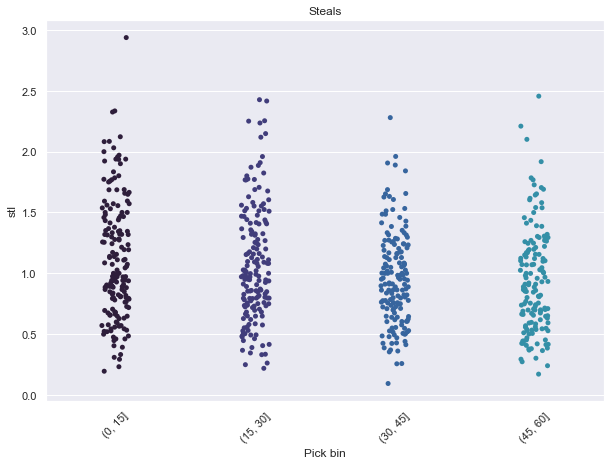

In [310]:
stls = sns.stripplot(x='pick', y='stl', data=careerStat)

stls.set(title='Steals', xlabel='Pick bin')
stls.set_xticklabels(stl.get_xticklabels(), rotation=45)

stls

<AxesSubplot:title={'center':'Blocks'}, xlabel='Pick bin', ylabel='blk'>

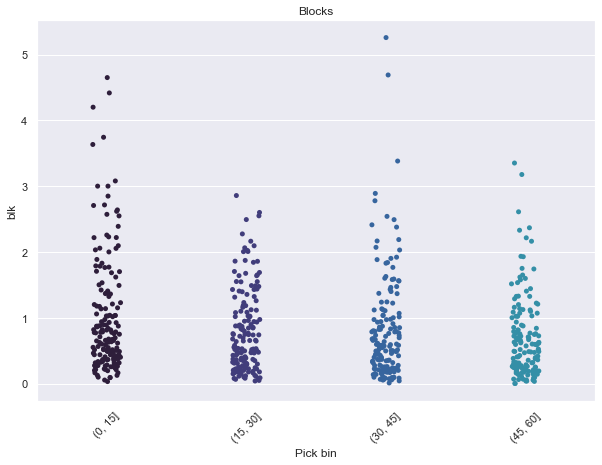

In [311]:
blks = sns.stripplot(x='pick', y='blk', data=careerStat)

blks.set(title='Blocks', xlabel='Pick bin')
blks.set_xticklabels(blks.get_xticklabels(), rotation=45)

blks

In [159]:
#When I attempted classification with creating the bins for the other remaining columns
#bins separated by quartiles

#for column in careerStat.columns[1:13]:
    #careerStat[column] = pd.qcut(careerStat[column], q=4)

In [50]:
#Decision Tree Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn import svm, datasets

In [102]:
#Now to re-create the bins in integer format
careerStat = pd.read_csv (r'C:\Users\andre\Downloads\NBA - College and Draft\careerStat2.csv')

In [103]:
#Bins into first and second round of draft
t_bins = [1, 2]

careerStat['pick'] = pd.cut(careerStat['pick'], bins=[0, 30, 60], labels=t_bins)


In [104]:
print(careerStat['pick'].value_counts())

1    335
2    308
Name: pick, dtype: int64


In [105]:
#dropping class and uneeded variable
x = careerStat.drop(["pick", "player_name"], axis = 1) 

#Assigning class variable -- target
y = careerStat['pick'] 

x.shape, y.shape

((643, 9), (643,))

In [99]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)

In [80]:
#Standardizing the data
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [64]:
#Decision tree classifier 

dt = DecisionTreeClassifier()

dt = dt.fit(xtrain_scaled, ytrain) 
dt

DecisionTreeClassifier()

In [65]:
cross_val_score(dt, xtrain_scaled, ytrain, cv=5)

array([0.58888889, 0.47777778, 0.51111111, 0.5       , 0.58888889])

In [66]:
ypred = dt.predict(xtest_scaled)
accuracy_score(ypred, ytest)

0.5129533678756477

In [81]:
#SVM Modeling

svm_c = svm.SVC()
svm_c.fit(xtrain_scaled, ytrain)

SVC()

In [68]:
ypred = svm_c.predict(xtest_scaled)
cross_val_score(svm_c, xtrain_scaled, ytrain, cv=5)

array([0.68888889, 0.58888889, 0.65555556, 0.6       , 0.63333333])

In [69]:
accuracy_score(ypred, ytest)

0.6062176165803109

In [82]:
#Polynomial kernel case
svm_poly = svm.SVC(kernel = 'poly')
svm_poly.fit(xtrain_scaled, ytrain)

SVC(kernel='poly')

In [83]:
ypred = svm_poly.predict(xtest_scaled)
cross_val_score(svm_poly, xtrain_scaled, ytrain, cv=5)

array([0.55555556, 0.58888889, 0.57777778, 0.53333333, 0.56666667])

In [84]:
svm_poly.score(xtest_scaled, ytest)

0.5647668393782384

In [85]:
#Linear kernel case
svm_l = LinearSVC(max_iter=5000, multi_class = 'ovr')
svm_l.fit(xtrain_scaled, ytrain)

LinearSVC(max_iter=5000)

In [86]:
ypred = svm_l.predict(xtest_scaled)
cross_val_score(svm_c, xtrain_scaled, ytrain, cv=5)

array([0.56666667, 0.61111111, 0.63333333, 0.62222222, 0.64444444])

In [87]:
accuracy_score(ypred, ytest)

0.6062176165803109

<AxesSubplot:>

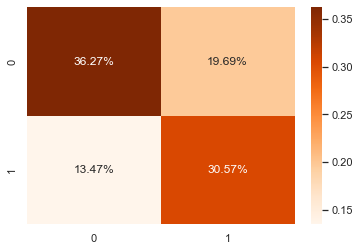

In [159]:
#Confusion matrix -- shows us what our predicted and expected classes are, and where our model places predictions
matrix = confusion_matrix(ytest, ypred)
sns.heatmap(
    matrix/np.sum(matrix),
    annot=True,
    cmap='Oranges',
    fmt='.2%'
)

In [183]:
#Random forest

rf = RandomForestClassifier()

rf.fit(xtrain_scaled,ytrain)
rf

RandomForestClassifier()

In [190]:
ypred=rf.predict(xtest_scaled)
cross_val_score(rf, xtrain_scaled, ytrain, cv=5)

array([0.57777778, 0.52222222, 0.54444444, 0.56666667, 0.54444444])

In [187]:
accuracy_score(ypred, ytest)

0.6269430051813472